# Projeto 1 

## 1 - Definição do problema de negócio 

<img width="633" height="112" style="display: block; margin-left: auto; margin-right: auto" src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png">

Queremos prever o preço de venda de um imóvel, e para isso utilizaremos um conjunto de dados históricos contendo algumas características dos imóveis (chamadas de variáveis preditoras) e o valor por qual ele foi vendido (SalePrice a variável alvo), no passado. 

Fonte dos dados: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Obs: uma descrição de todas as variáveis está no anexo ao final deste notebook. 

## 2 - Pré-processamento dos dados 

Nesta estapa iremos realizar a **análise exploratória** dos dados e a uma **pré-preparação** dos dados para modelagem preditiva. 

### 2.1 - Análise exploratória 

In [1]:
# Pacotes utilizados 
import pandas as pd 
import numpy as np 
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importando e verificando as dimensões do conjunto de dados.

df = pd.read_csv('dados/treino.csv')
print("Nº de registros: %d" % (df.shape[0]))
print("Nº de variáveis: %d" % (df.shape[1]))
df.head()

Nº de registros: 1460
Nº de variáveis: 81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Verificando valores missing

In [3]:
# Verificando se há valores missing (NaN) nas variáveis.

df_missing = pd.DataFrame(df.isna().sum()[df.isna().sum() != 0].sort_values(ascending = False), columns = ["qtd_nan"])
df_missing['porcentagem'] = round(df_missing['qtd_nan']*100/len(df),1)
df_missing

,qtd_nan,porcentagem
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


Removeremos as variáveis (colunas) cujo percentual de valores missing (NaN) seja maior que 40%. Assim sendo, as variáveis **PoolQC**, **MiscFeature**, **Alley**, **Fence** e **FireplaceQu** serão eliminadas. Também eliminaremos a variável **Id**, pois a mesma serve apenas para ordenação dos registros. 

In [4]:
df = df.drop(columns = 'Id')

In [5]:
# Verificando novamente.
df = df.drop(columns = df_missing[df_missing['porcentagem'] > 40].index)
df_missing = pd.DataFrame(df.isna().sum()[df.isna().sum() != 0].sort_values(ascending = False), columns = ["qtd_nan"])
df_missing['porcentagem'] = round(df_missing['qtd_nan']*100/len(df),1)
df_missing.head()

,qtd_nan,porcentagem
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


A variável **LotFrontage** possui 17,7% de valores missing, portanto 17,7% dos registros do dataframe, uma quantidade considerável de linhas a serem removidas. Assim, iremos substituir esses valores NaN pela **média** dos valores da variável. 

In [6]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace = True)

Para as demais variáveis que possuem valores missing inferiores a 40% do total, excluiremos os registros (linhas) que possuem tais valores.

In [7]:
df = df.dropna()

In [8]:
# Dataframe sem nenhuma variável missing.

df.isna().sum()[df.isna().sum() != 0].sort_values(ascending = False)

Series([], dtype: int64)

In [9]:
# Verificando o dataframe 

print("Nº de registros: %d" % (df.shape[0]))
print("Nº de variáveis: %d" % (df.shape[1]))
df.head()

Nº de registros: 1338
Nº de variáveis: 75


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### Verificando o tipo das variáveis. 

In [10]:
# Variáveis quantitativas  
quant_var = df.dtypes[df.dtypes != "object"].index
print("São %d variáveis quantitativas(numéricas)." %(len(quant_var)))
quant_var

São 37 variáveis quantitativas(numéricas).


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
# Variáveis qualitativas   
qual_var = df.dtypes[df.dtypes == "object"].index
print("São %d variáveis categóricas." %(len(qual_var)))
qual_var 

São 38 variáveis categóricas.


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

Agora iremos verificar se alguma das variáveis quantitativas podem ser uma variável do tipo qualitativa, ou seja, a variável possui elementos numéricos discretos que representam informação qualitativa. 
Consideraremos uma variável que possui até **20 elementos numéricos discretos** como uma variável qualitativa, denominada **variável numérico categórica**.

In [12]:
num_cat_var = 20

var_num_cat = []
for var in quant_var:
    if(len(pd.unique(df[var])) <= num_cat_var):
        var_num_cat.append(var)

print("O df possui %d variáveis quantitativas que representam categorias." % (len(var_num_cat)))     
var_num_cat

O df possui 18 variáveis quantitativas que representam categorias.


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

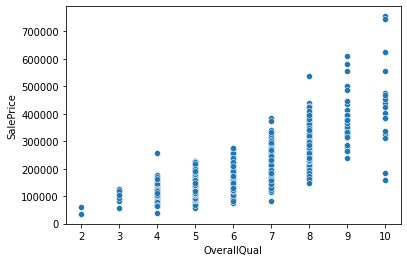

In [13]:
# Por exemplo, a variável OverallQual é numérica, mas representa categorias.
sea.scatterplot(data = df, x = 'OverallQual', y = 'SalePrice')
plt.show()

1) Agora faremos um plot de dispersão entre as **variáveis numérico-categóricas** e a variável alvo **SalePrice**

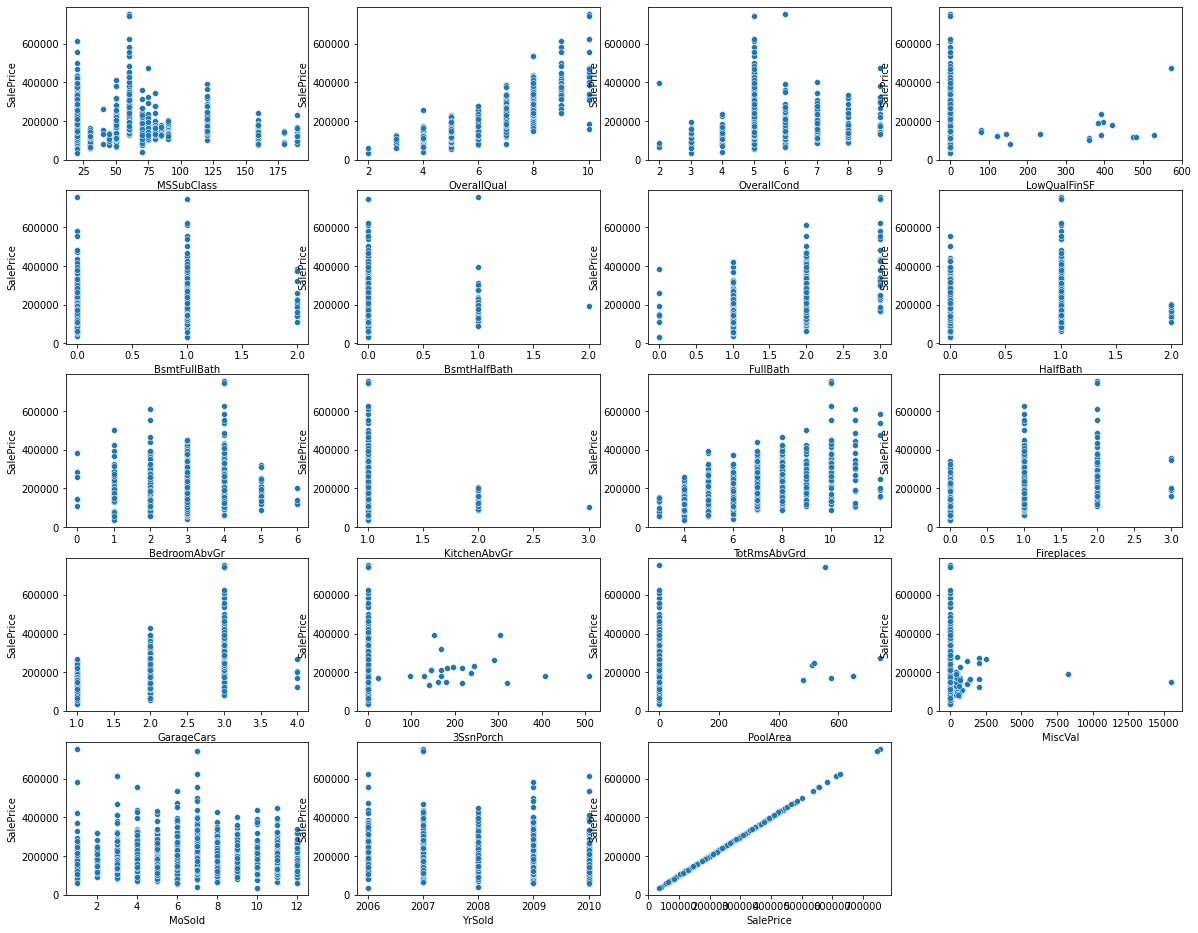

In [14]:
# Adicionando a variável alvo 
ncv = list(var_num_cat)
ncv.append('SalePrice')

df_num_cat = df[ncv]

plt.figure(figsize = (20,40))
x = 1
for variavel in df_num_cat.columns:
    plt.subplot(12, 4, x)
    sea.scatterplot(data = df, x = variavel, y = 'SalePrice')
    x += 1

Com base nos gráficos acima, podemos notar que as variáveis **LowQualFinSF**, **3SsnPorch**, **PoolArea** e **MiscVal** são variáveis quantitativas (contínuas). Removeremos elas da lista de variáveis numérico categóricas. 

In [15]:
var_num_cat = [item for item in var_num_cat if item not in ['LowQualFinSF', '3SsnPorch', 'PoolArea','MiscVal']]
var_num_cat

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold',
 'YrSold']

In [16]:
# Atualizando a lista de variáveis categóricas.

qual_var = list(df.dtypes[df.dtypes == "object"].index) 
qual_var.extend(var_num_cat)
qual_var

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold',
 'YrSold']

Agora iremos adicionar as quatro variáveis **LowQualFinSF**, **3SsnPorch**, **PoolArea** e **MiscVal** na lista de variáveis quantitativas, e também remover as variáveis restantes da lista de variáveis numérico categóricas, na lista de variáveis quantitativas. Assim, teremos apenas uma lista de variáveis quantitativas e uma lista de variáveis qualitativas.

In [17]:
quant_var = list(df.dtypes[df.dtypes != "object"].index) 
quant_var.extend(['LowQualFinSF', '3SsnPorch', 'PoolArea','MiscVal'])
A = set(quant_var)
B = set(var_num_cat)
quant_var = list(A.difference(B))
quant_var

['YearBuilt',
 'PoolArea',
 'WoodDeckSF',
 'EnclosedPorch',
 'BsmtUnfSF',
 'LowQualFinSF',
 'SalePrice',
 'BsmtFinSF2',
 'GarageYrBlt',
 'LotArea',
 'TotalBsmtSF',
 'MiscVal',
 'OpenPorchSF',
 'ScreenPorch',
 'YearRemodAdd',
 '3SsnPorch',
 '2ndFlrSF',
 'GarageArea',
 '1stFlrSF',
 'GrLivArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'LotFrontage']

2) Agora faremos um plot de dispersão entre as **variáveis quantitativas** e a variável alvo **SalePrice**

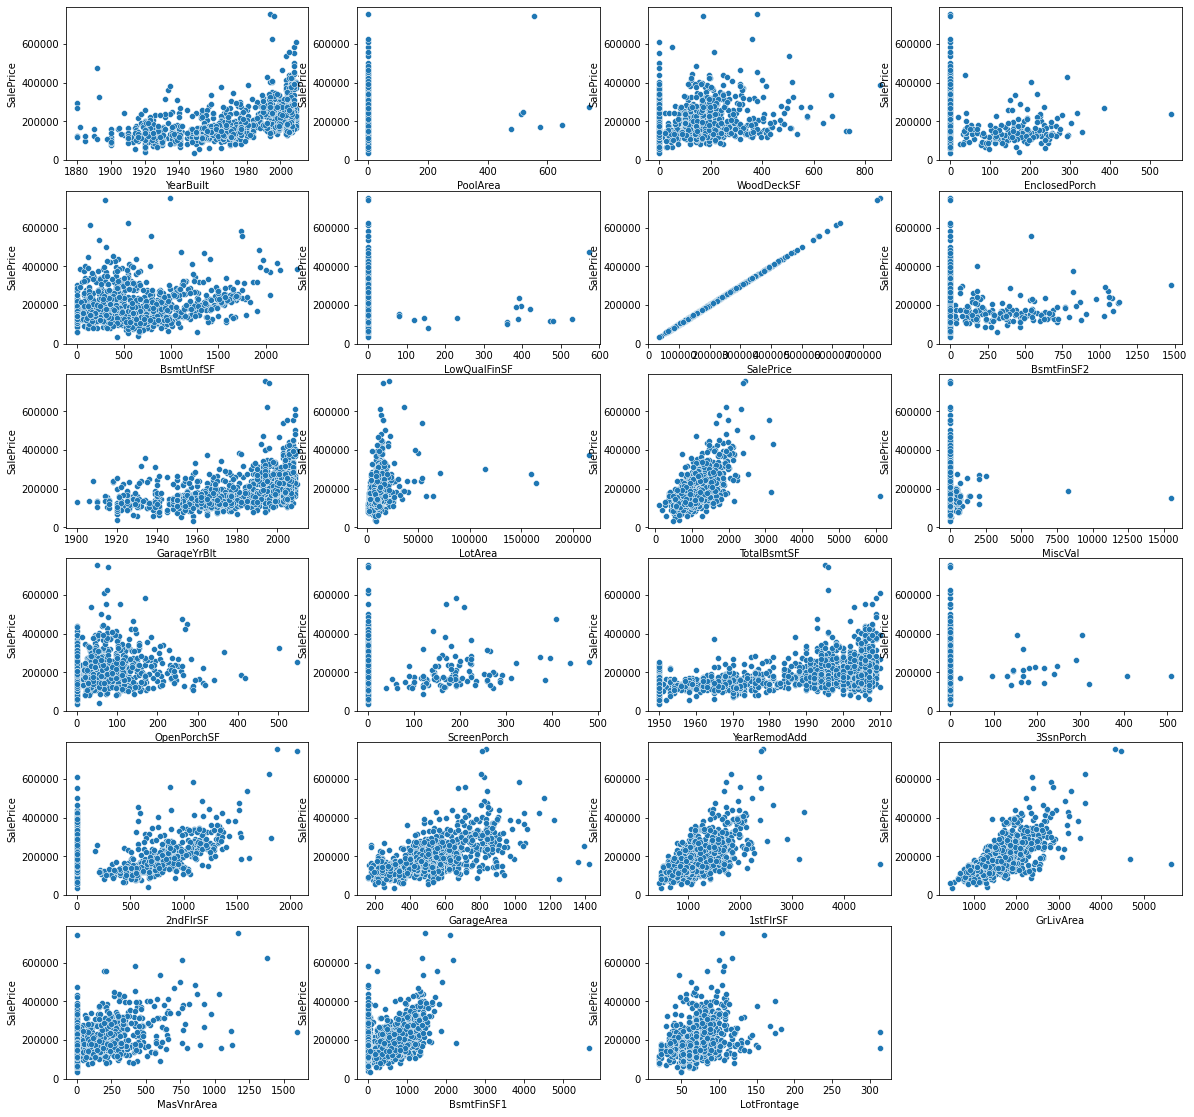

In [18]:
df_quant_var = df[quant_var]

plt.figure(figsize = (20,40))
x = 1
for variavel in df_quant_var.columns:
    plt.subplot(12, 4, x)
    sea.scatterplot(data = df, x = variavel, y = 'SalePrice')
    x += 1

3) Agora faremos um plot de dispersão entre as **variáveis qualitativas** e a variável alvo **SalePrice**

In [19]:
# Acrescentando a variável alvo no dataframe de variáveis categóricas. 
qual_var.append('SalePrice')

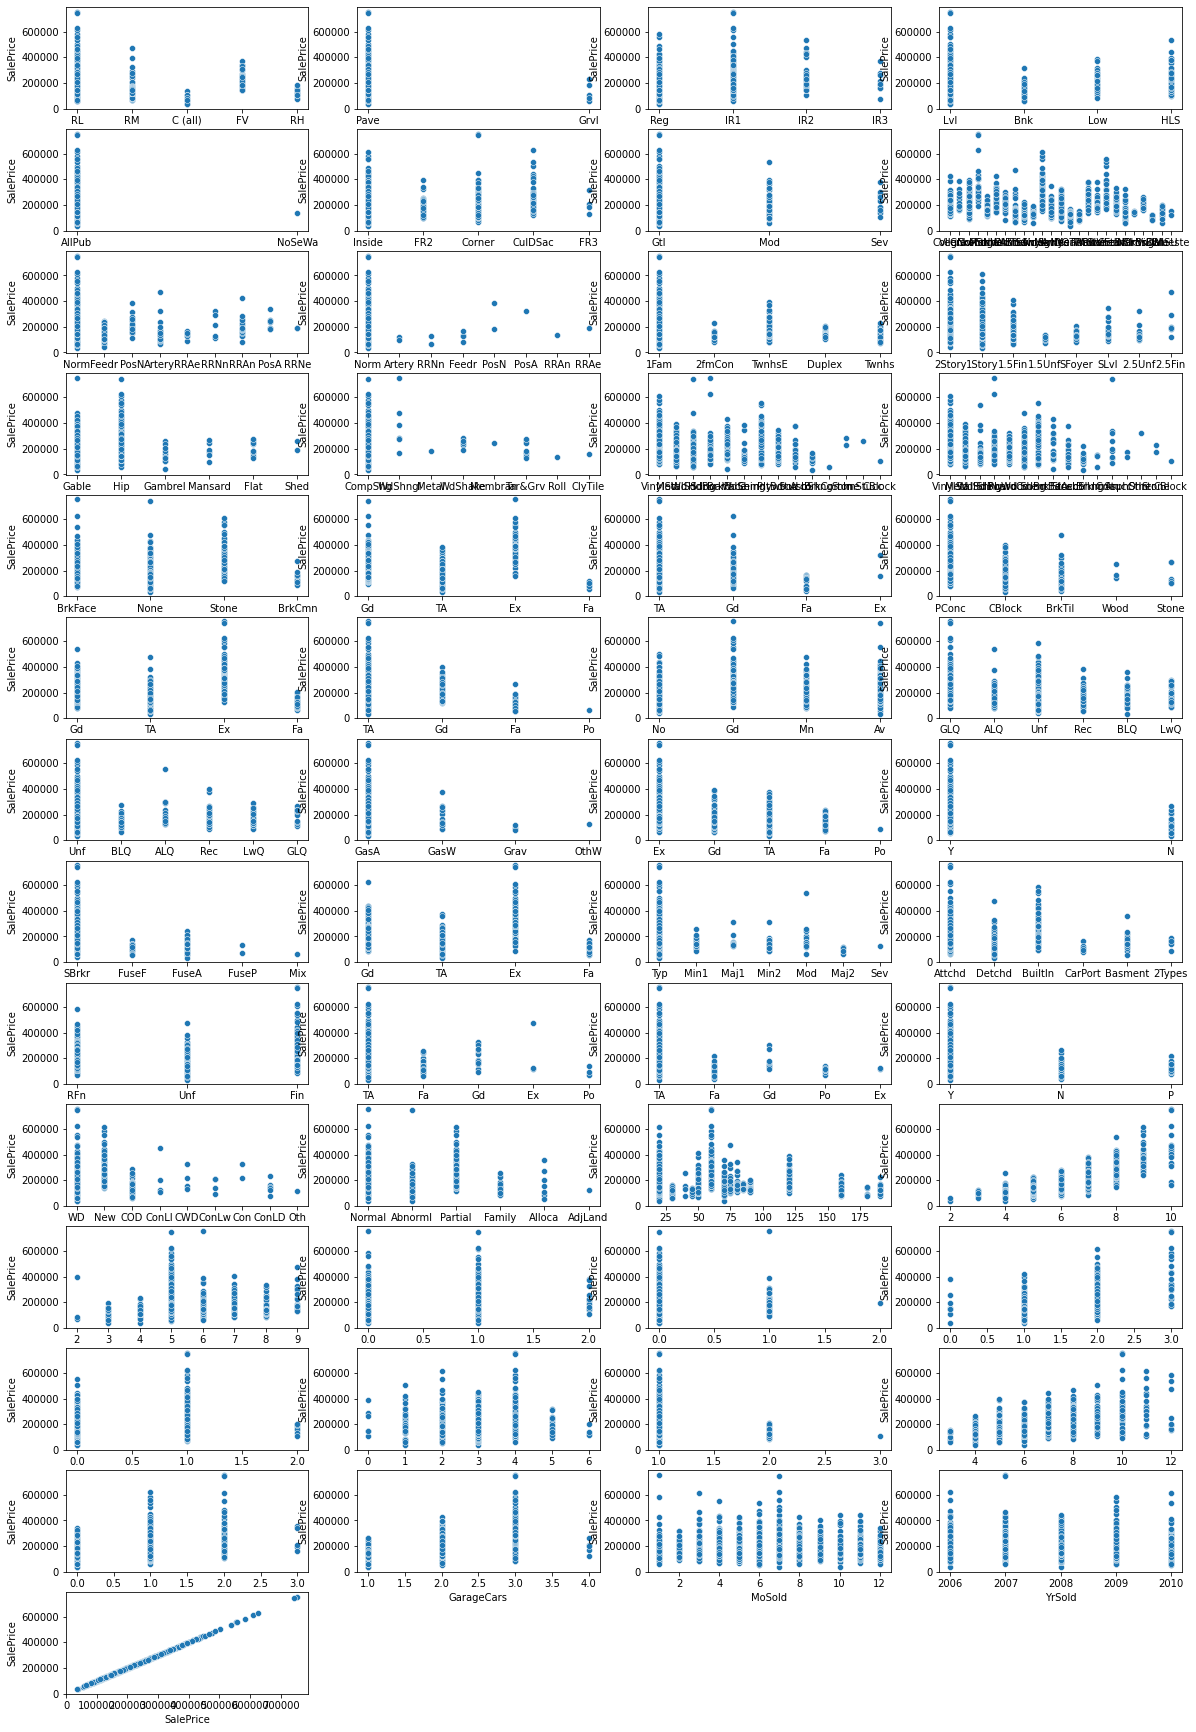

In [20]:
df_qual_var = df[qual_var]

plt.figure(figsize = (20,40))
x = 1
for variavel in df_qual_var.columns:
    plt.subplot(18, 4, x)
    sea.scatterplot(data = df, x = variavel, y = 'SalePrice')
    x += 1

#### Informações obtidas após as manipulações 

O dataframe possui:
    
    I) 23 variáveis quantitativas (incluindo a variável alvo).
    II) 52 variáveis qualitativas. 
    III) Nº de registros: 1338

Note que algumas das variáveis qualitativas são do tipo "object", ou seja, texto. Esse tipo de informação não pode ser apresentada aos algoritmos de aprendizado de máquina, logo devemos alterar isso, para números discretos. Essa transformação pode parecer muito abstrata, então utilizaremos um exemplo para mostrar como ela funciona:

In [21]:
# Exemplo utilizando a função get_dummies() do pandas. 
# Utilizaremos apenas duas variáveis para exemplificar. 

df2 = df[['MSZoning','Street']]
print("Categorias na variável 'MSZoning': ", pd.unique(df2['MSZoning']))
print("Categorias na variável 'Street': ", pd.unique(df2['Street']))
df2

Categorias na variável 'MSZoning':  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Categorias na variável 'Street':  ['Pave' 'Grvl']


,MSZoning,Street
0,RL,Pave
1,RL,Pave
2,RL,Pave
3,RL,Pave
4,RL,Pave
...,...,...
1455,RL,Pave
1456,RL,Pave
1457,RL,Pave
1458,RL,Pave


In [22]:
# Ao utilizar a função get_dummies no dataframe da celula anterior perceba que cada uma das categorias se tornou uma coluna. 
# Houve uma expansão da quantidade de dados, mas a informação representada é a mesma, mas agora de forma numérica. 

df2 = pd.get_dummies(df2, drop_first = False)
df2.head()

# Fim do exemplo. 

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave
0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,1
2,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1
4,0,0,0,1,0,0,1


Utilizando a técnica demonstrada no exemplo, transformaremos todas variáveis qualitativas com dados em texto, presentes no dataframe, em variáveis qualitativas representadas por **valores discretos**.

In [23]:
df_transf = df 
df_transf = pd.get_dummies(df_transf, drop_first = False)
df_transf.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


#### Análise das variáveis quantitativas 

In [24]:
df_quant_var = df[quant_var]
df_quant_var.head()

,YearBuilt,PoolArea,WoodDeckSF,EnclosedPorch,BsmtUnfSF,LowQualFinSF,SalePrice,BsmtFinSF2,GarageYrBlt,LotArea,...,ScreenPorch,YearRemodAdd,3SsnPorch,2ndFlrSF,GarageArea,1stFlrSF,GrLivArea,MasVnrArea,BsmtFinSF1,LotFrontage
0,2003,0,0,0,150,0,208500,0,2003.0,8450,...,0,2003,0,854,548,856,1710,196.0,706,65.0
1,1976,0,298,0,284,0,181500,0,1976.0,9600,...,0,1976,0,0,460,1262,1262,0.0,978,80.0
2,2001,0,0,0,434,0,223500,0,2001.0,11250,...,0,2002,0,866,608,920,1786,162.0,486,68.0
3,1915,0,0,272,540,0,140000,0,1998.0,9550,...,0,1970,0,756,642,961,1717,0.0,216,60.0
4,2000,0,192,0,490,0,250000,0,2000.0,14260,...,0,2000,0,1053,836,1145,2198,350.0,655,84.0


In [25]:
# Dimensões 

df_quant_var.shape

(1338, 23)

In [26]:
# Nome e tipo das variáveis 

df_quant_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YearBuilt      1338 non-null   int64  
 1   PoolArea       1338 non-null   int64  
 2   WoodDeckSF     1338 non-null   int64  
 3   EnclosedPorch  1338 non-null   int64  
 4   BsmtUnfSF      1338 non-null   int64  
 5   LowQualFinSF   1338 non-null   int64  
 6   SalePrice      1338 non-null   int64  
 7   BsmtFinSF2     1338 non-null   int64  
 8   GarageYrBlt    1338 non-null   float64
 9   LotArea        1338 non-null   int64  
 10  TotalBsmtSF    1338 non-null   int64  
 11  MiscVal        1338 non-null   int64  
 12  OpenPorchSF    1338 non-null   int64  
 13  ScreenPorch    1338 non-null   int64  
 14  YearRemodAdd   1338 non-null   int64  
 15  3SsnPorch      1338 non-null   int64  
 16  2ndFlrSF       1338 non-null   int64  
 17  GarageArea     1338 non-null   int64  
 18  1stFlrSF

Resumo estatístico básico

In [27]:
df_quant_var.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
YearBuilt,1338.0,1973.0,29.6,1880.0,1956.0,1976.0,2001.0,2010.0
PoolArea,1338.0,3.0,42.0,0.0,0.0,0.0,0.0,738.0
WoodDeckSF,1338.0,99.4,127.5,0.0,0.0,6.0,174.5,857.0
EnclosedPorch,1338.0,21.3,60.8,0.0,0.0,0.0,0.0,552.0
BsmtUnfSF,1338.0,582.5,440.0,0.0,248.0,489.0,815.8,2336.0
LowQualFinSF,1338.0,4.2,40.7,0.0,0.0,0.0,0.0,572.0
SalePrice,1338.0,186761.8,78913.8,35311.0,135000.0,168500.0,220000.0,755000.0
BsmtFinSF2,1338.0,49.2,166.2,0.0,0.0,0.0,0.0,1474.0
GarageYrBlt,1338.0,1978.6,24.8,1900.0,1962.0,1980.0,2002.0,2010.0
LotArea,1338.0,10706.3,10336.6,1300.0,7744.0,9600.0,11760.8,215245.0


Correlações

In [28]:
df_quant_var.corr().round(1)

,YearBuilt,PoolArea,WoodDeckSF,EnclosedPorch,BsmtUnfSF,LowQualFinSF,SalePrice,BsmtFinSF2,GarageYrBlt,LotArea,...,ScreenPorch,YearRemodAdd,3SsnPorch,2ndFlrSF,GarageArea,1stFlrSF,GrLivArea,MasVnrArea,BsmtFinSF1,LotFrontage
YearBuilt,1.0,0.0,0.2,-0.4,0.1,-0.2,0.5,-0.1,0.8,-0.0,...,-0.1,0.6,0.0,0.0,0.4,0.3,0.2,0.3,0.2,0.1
PoolArea,0.0,1.0,0.1,0.1,-0.0,0.1,0.1,0.0,-0.0,0.1,...,0.0,0.0,-0.0,0.1,0.1,0.1,0.2,0.0,0.1,0.2
WoodDeckSF,0.2,0.1,1.0,-0.1,-0.0,-0.0,0.3,0.1,0.2,0.2,...,-0.1,0.2,-0.0,0.1,0.2,0.2,0.2,0.1,0.2,0.1
EnclosedPorch,-0.4,0.1,-0.1,1.0,-0.0,0.1,-0.1,0.0,-0.3,-0.0,...,-0.1,-0.2,-0.0,0.1,-0.1,-0.1,0.0,-0.1,-0.1,0.0
BsmtUnfSF,0.1,-0.0,-0.0,-0.0,1.0,-0.0,0.2,-0.2,0.2,-0.0,...,-0.0,0.2,0.0,-0.0,0.2,0.3,0.2,0.1,-0.6,0.1
LowQualFinSF,-0.2,0.1,-0.0,0.1,-0.0,1.0,-0.0,0.0,-0.0,0.0,...,0.0,-0.1,-0.0,0.0,0.0,-0.0,0.1,-0.1,-0.1,0.0
SalePrice,0.5,0.1,0.3,-0.1,0.2,-0.0,1.0,-0.0,0.5,0.3,...,0.1,0.5,0.0,0.3,0.6,0.6,0.7,0.5,0.4,0.3
BsmtFinSF2,-0.1,0.0,0.1,0.0,-0.2,0.0,-0.0,1.0,-0.1,0.1,...,0.1,-0.1,-0.0,-0.1,-0.1,0.1,-0.0,-0.1,-0.1,0.0
GarageYrBlt,0.8,-0.0,0.2,-0.3,0.2,-0.0,0.5,-0.1,1.0,-0.0,...,-0.1,0.6,0.0,0.1,0.6,0.2,0.2,0.2,0.1,0.1
LotArea,-0.0,0.1,0.2,-0.0,-0.0,0.0,0.3,0.1,-0.0,1.0,...,0.0,0.0,0.0,0.0,0.2,0.3,0.3,0.1,0.2,0.3


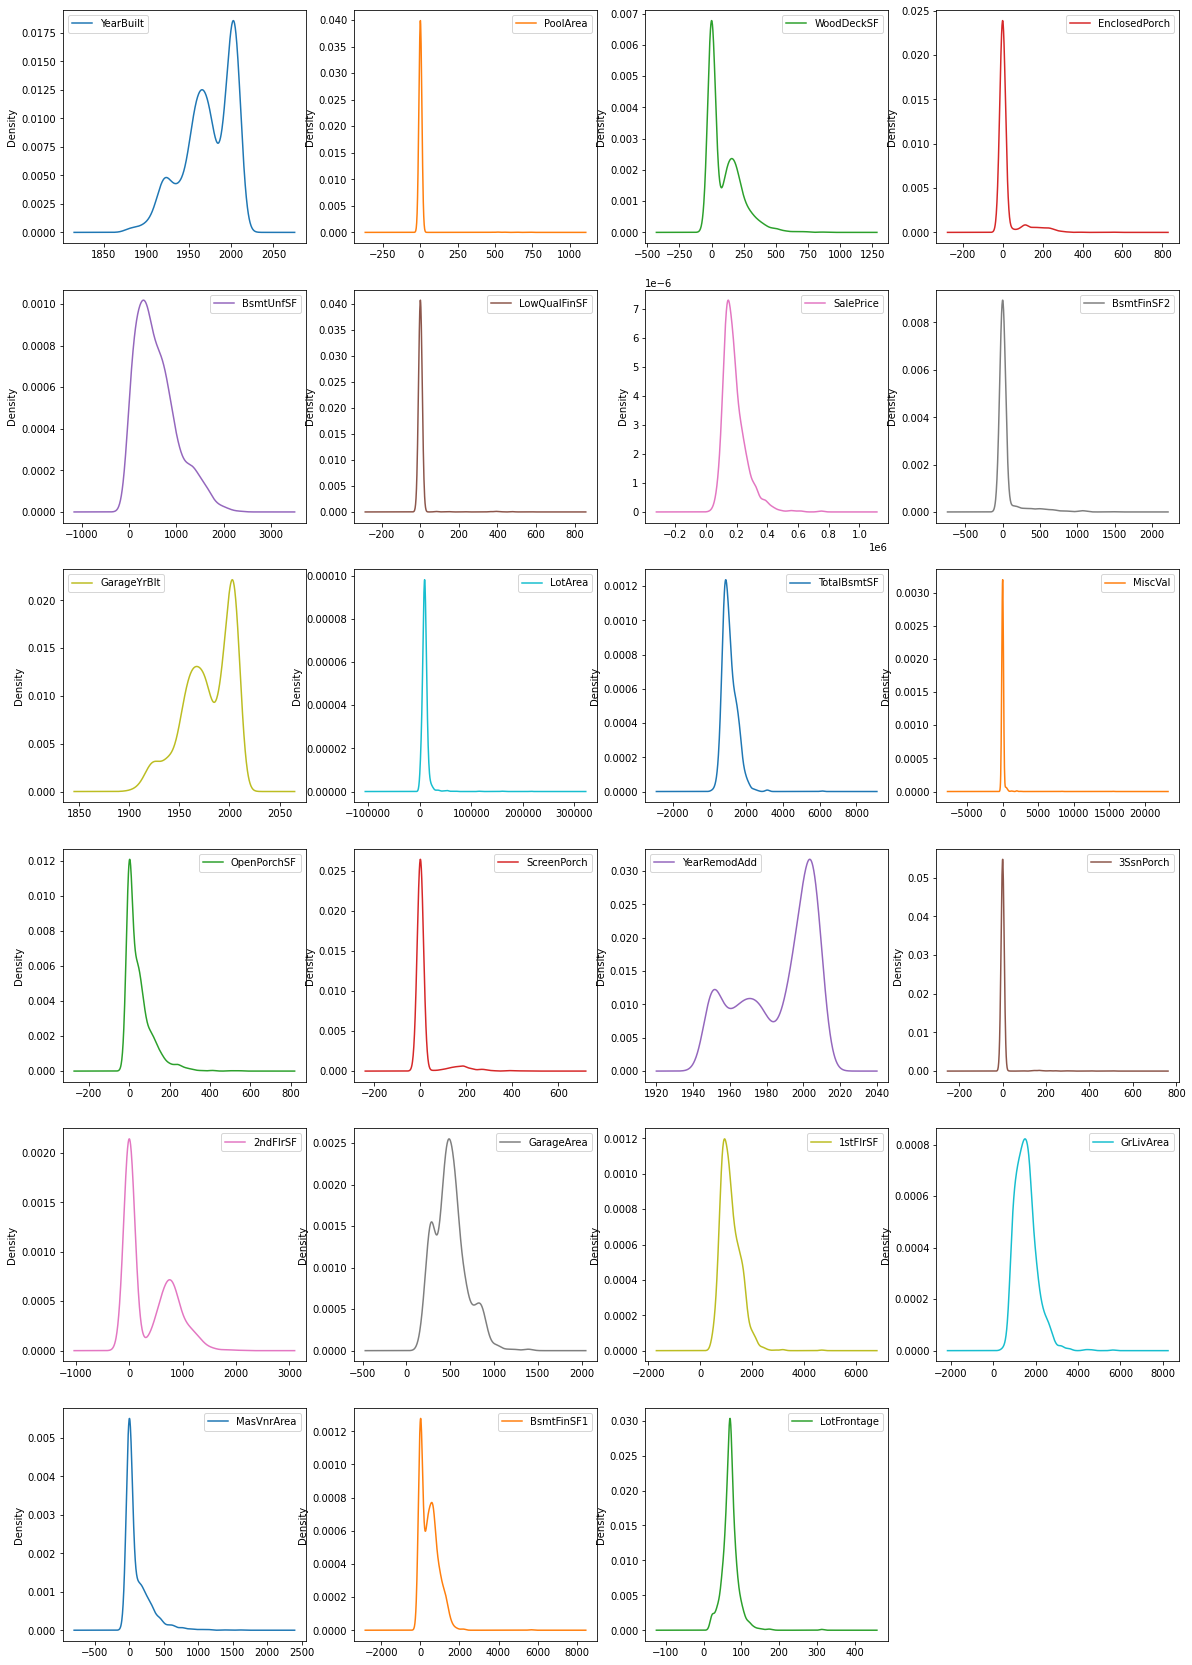

In [29]:
# O density plot facilita a visualização da distribuição dos dados.

df_quant_var.plot(kind = 'density', figsize = (20,30), layout = (6, 4), subplots = True, sharex = False)
plt.show()

Identificando outliers 

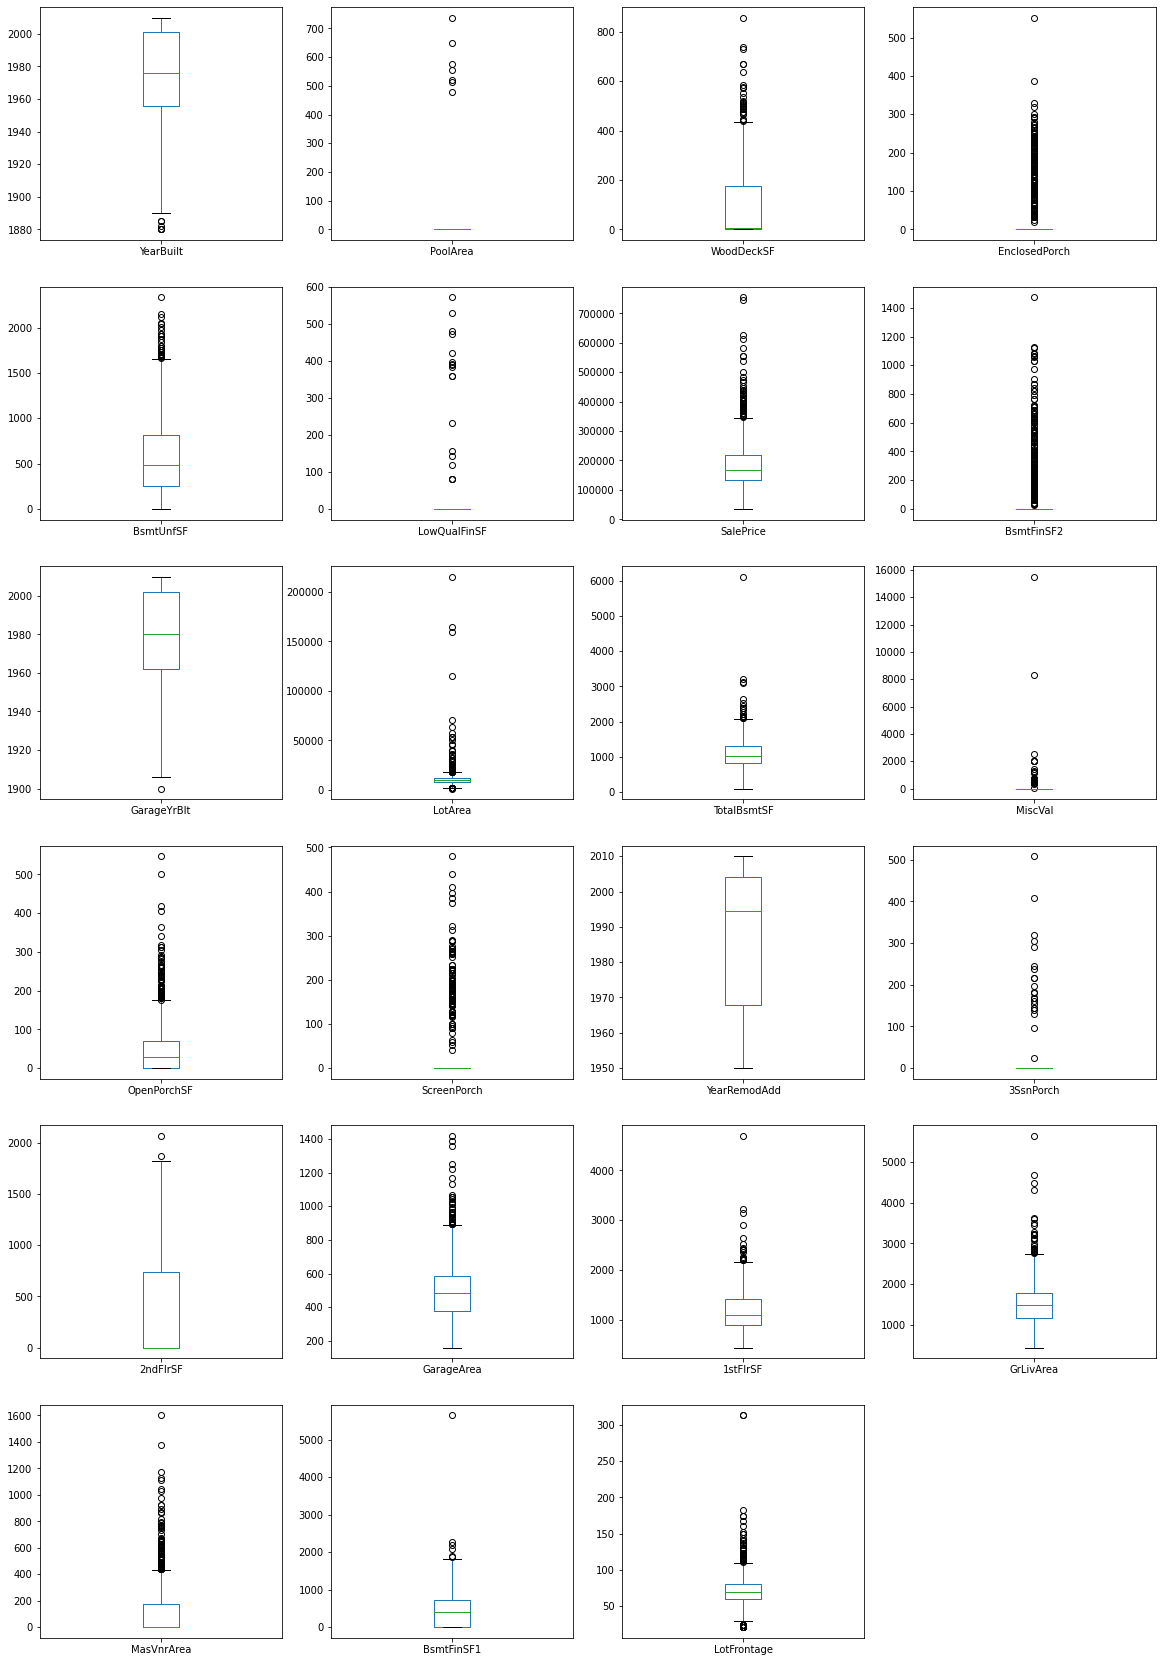

In [30]:
df_quant_var.plot(kind = 'box', figsize = (20,30), layout = (6, 4), subplots = True, sharex = False)
plt.show()

In [31]:
# Porcentagem de valores extremos em cada variável. 
# Criei uma função para me informar sobre a quantidade de elementos acima do limite superior e abaixo do limite inferior. 

def qtd_outliers(df):
    # Função criada para retornar um dict com a qtd de outliers.
    # Retorna a qtd acima do lim sup e abaixo do lim inf. 
    dic = {}
    for i in df.columns:
    
        q3 = df[i].quantile(q = 0.75)
        q1 = df[i].quantile(q = 0.25)
        
        sup_outlier = q3 + (3/2)*(q3-q1) 
        inf_outlier = q1 - (3/2)*(q3-q1)

        qtd_sup = len(df[i][df[i] > sup_outlier])
        qtd_inf = len(df[i][df[i] < inf_outlier])
    
        dic[i] = [qtd_sup, qtd_inf]
    return dic 

# Dataframe com a qtq de outliers acima do limite superior e abaixo do limite inferior 

outliers = qtd_outliers(df_quant_var)
tabela_outliers = pd.DataFrame(outliers, index = ['Superior', 'Inferior'])
tabela_outliers

,YearBuilt,PoolArea,WoodDeckSF,EnclosedPorch,BsmtUnfSF,LowQualFinSF,SalePrice,BsmtFinSF2,GarageYrBlt,LotArea,...,ScreenPorch,YearRemodAdd,3SsnPorch,2ndFlrSF,GarageArea,1stFlrSF,GrLivArea,MasVnrArea,BsmtFinSF1,LotFrontage
Superior,0,7,27,183,29,18,56,162,0,63,...,116,0,23,2,38,17,29,82,6,45
Inferior,7,0,0,0,0,0,0,0,1,13,...,0,0,0,0,0,0,0,0,0,36


Medidas de forma 

In [32]:
# Assimetria 

df_quant_var.skew()

YearBuilt        -0.677966
PoolArea         14.187832
WoodDeckSF        1.481740
EnclosedPorch     3.205286
BsmtUnfSF         0.935363
LowQualFinSF     10.566815
SalePrice         1.943686
BsmtFinSF2        4.146519
GarageYrBlt      -0.669457
LotArea          11.938124
TotalBsmtSF       2.214029
MiscVal          24.632578
OpenPorchSF       2.250952
ScreenPorch       3.916848
YearRemodAdd     -0.563345
3SsnPorch        10.096553
2ndFlrSF          0.769147
GarageArea        0.807078
1stFlrSF          1.397431
GrLivArea         1.430307
MasVnrArea        2.582685
BsmtFinSF1        1.693397
LotFrontage       2.479517
dtype: float64

In [33]:
# Curtose 

df_quant_var.kurt()

YearBuilt         -0.337735
PoolArea         204.262059
WoodDeckSF         2.795283
EnclosedPorch     11.314761
BsmtUnfSF          0.481728
LowQualFinSF     115.763183
SalePrice          6.815307
BsmtFinSF2        18.985684
GarageYrBlt       -0.392226
LotArea          191.844258
TotalBsmtSF       18.372875
MiscVal          694.307395
OpenPorchSF        7.628230
ScreenPorch       16.541519
YearRemodAdd      -1.187460
3SsnPorch        118.289227
2ndFlrSF          -0.623164
GarageArea         1.171789
1stFlrSF           6.058740
GrLivArea          5.324558
MasVnrArea         9.454536
BsmtFinSF1        11.630118
LotFrontage       22.818422
dtype: float64

#### Conclusão parcial 

Com base nas medidas estatísticas de **tendência central**, **dispersão**, **forma** e de **correlação** e na análise dos gráficos de **distribuição** e **boxplots** , notamos que:

    I) Algumas variáveis deverão receber uma tranformação para melhorar a distribuição dos dados (medidas de forma). 
    
    II) O dataframe deverá ser normalizado e padronizado, afim de deixar todas as variáveis em uma escala comum. 

    III) Algumas variáveis serão analisadas em mais detalhes para definir se os valores extremos fazem sentido ou não (esta  etapa poderia ser feita com auxílio da área de negócio em um problema real).  
    
    IV) Outliers deverão ser tratados.
    
    V) Algumas variáveis possuem uma alta correlação e podem levar a multicolinearidade.  
    
Variáveis a serem analisadas em mais detalhes: **PoolArea**, **BsmtFinSF1**, **BsmtFinSF2**, **TotalBsmtSF**, **OpenPorchSF**, **GrLivArea**, **LotFrontage**, **3SsnPorch**, **ScreenPorch**, **MiscVal**, **EnclosedPorch**, **LowQualFinSF**, **LotArea**, **MasVnrArea**.           

In [34]:
# Variáveis quantitativas 
quant_var

['YearBuilt',
 'PoolArea',
 'WoodDeckSF',
 'EnclosedPorch',
 'BsmtUnfSF',
 'LowQualFinSF',
 'SalePrice',
 'BsmtFinSF2',
 'GarageYrBlt',
 'LotArea',
 'TotalBsmtSF',
 'MiscVal',
 'OpenPorchSF',
 'ScreenPorch',
 'YearRemodAdd',
 '3SsnPorch',
 '2ndFlrSF',
 'GarageArea',
 '1stFlrSF',
 'GrLivArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'LotFrontage']

In [35]:
# Variáveis qualitativas 
qual_var

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold',
 'YrSold',
 'SalePrice']

#### Salvando análises e transformações.

In [36]:
df.to_csv('dados/df_bruto.csv', index = False)
df_transf.to_csv('dados/df_transf.csv', index = False)

### ANEXO 

#### Descrição das variáveis

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property.

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
